In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

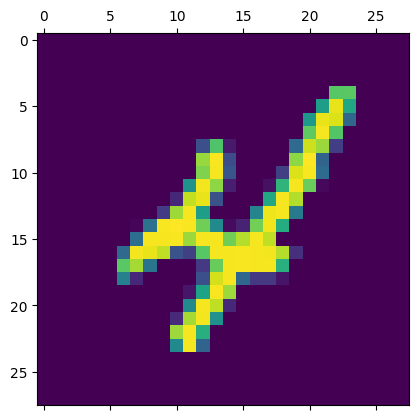

In [6]:
plt.matshow(x_train[9])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8708 - loss: 0.4572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9611 - loss: 0.1336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9735 - loss: 0.0871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9812 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9849 - loss: 0.0503


In [11]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.0974


[0.08075764775276184, 0.9746000170707703]

In [12]:
y_predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [13]:
y_predict[0]

array([9.9121023e-04, 6.9663991e-05, 1.7777744e-01, 9.7778243e-01,
       1.2573164e-06, 5.5023558e-02, 4.4536020e-07, 9.9998492e-01,
       1.4107290e-01, 4.4968590e-01], dtype=float32)

In [14]:
np.argmax(y_predict[0])

np.int64(7)

In [18]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

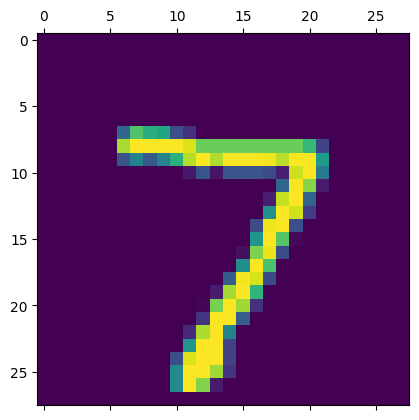

In [16]:
plt.matshow(x_test[0])

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    1,    3,    4,    2,    2,    3],
       [   0, 1127,    4,    0,    0,    1,    1,    0,    2,    0],
       [   3,    2, 1003,    3,    2,    0,    2,   10,    7,    0],
       [   0,    0,    6,  990,    0,    4,    0,    5,    3,    2],
       [   2,    0,    1,    2,  952,    0,    4,    2,    2,   17],
       [   2,    1,    0,    7,    0,  880,    1,    0,    1,    0],
       [   4,    3,    3,    1,    4,    9,  930,    1,    2,    1],
       [   0,    5,    9,    2,    0,    1,    0, 1000,    3,    8],
       [   3,    1,    8,   14,    4,   13,    1,    6,  921,    3],
       [   0,    3,    0,    9,    6,    6,    1,    4,    0,  980]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

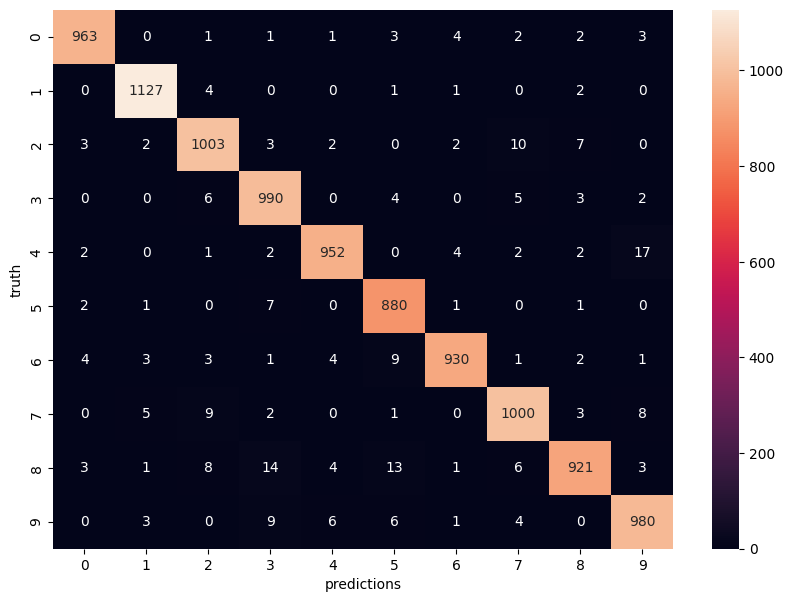

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predictions")
plt.ylabel("truth")